In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-27 00:00:00+00:00,140.88,141.22,138.62,139.39,23575094,33.248219,33.328460,32.714850,32.896573,94300376,0.0,1.0
1,AAPL,2017-03-28 00:00:00+00:00,143.80,144.04,140.62,140.91,33374805,33.937350,33.993991,33.186858,33.255299,133499220,0.0,1.0
2,AAPL,2017-03-29 00:00:00+00:00,144.12,144.49,143.19,143.68,29189955,34.012871,34.100193,33.793388,33.909030,116759820,0.0,1.0
3,AAPL,2017-03-30 00:00:00+00:00,143.93,144.50,143.50,144.19,21207252,33.968031,34.102553,33.866549,34.029392,84829008,0.0,1.0
4,AAPL,2017-03-31 00:00:00+00:00,143.66,144.27,143.01,143.72,19661651,33.904310,34.048272,33.750907,33.918470,78646604,0.0,1.0


In [3]:
df.shape

(1260, 14)

Visualize the closing price history

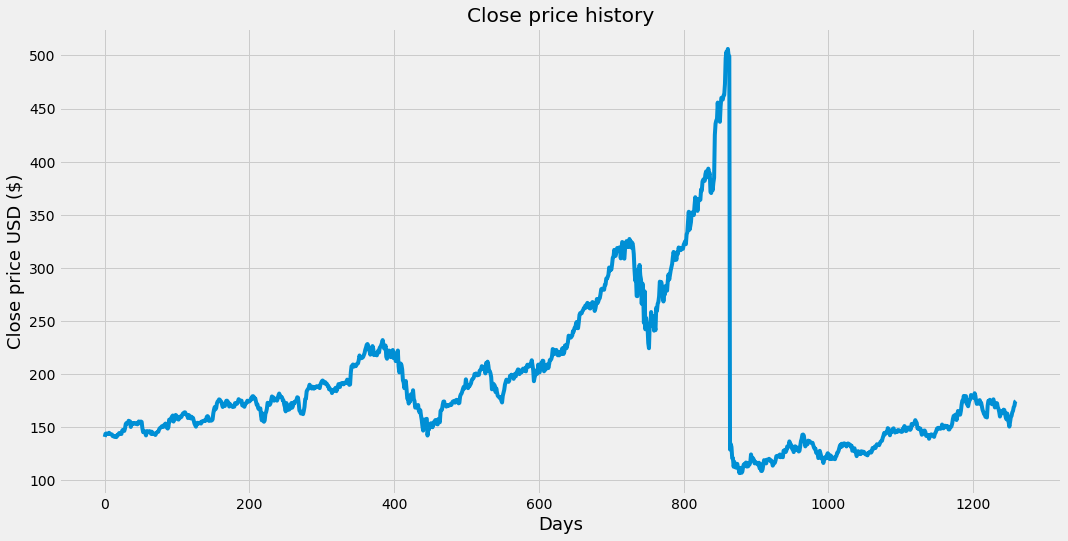

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(df['close'])
plt.show()

In [7]:
data=df.filter(['close'])

dataset=data.values

training_data_len=math.ceil(len(dataset)* 0.8)

training_data_len

1008

scale the data

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.08525986],
       [0.09257358],
       [0.09337508],
       ...,
       [0.1587226 ],
       [0.16839073],
       [0.17001879]])

create the training dataset

In [10]:
train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    

In [11]:
x_train,y_train=np.array(x_train), np.array(y_train)

In [13]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(948, 60, 1)

LSTM MODEL

In [28]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

948/948 [==============================] - 19s 18ms/step - loss: 0.0091


In [31]:
test_data=scaled_data[training_data_len-60:,:]

x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [32]:
x_test=np.array(x_test)


In [33]:
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [34]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [35]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.686764044383216

C:\Users\aluko\AppData\Local\Temp\ipykernel_12744\3377975384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


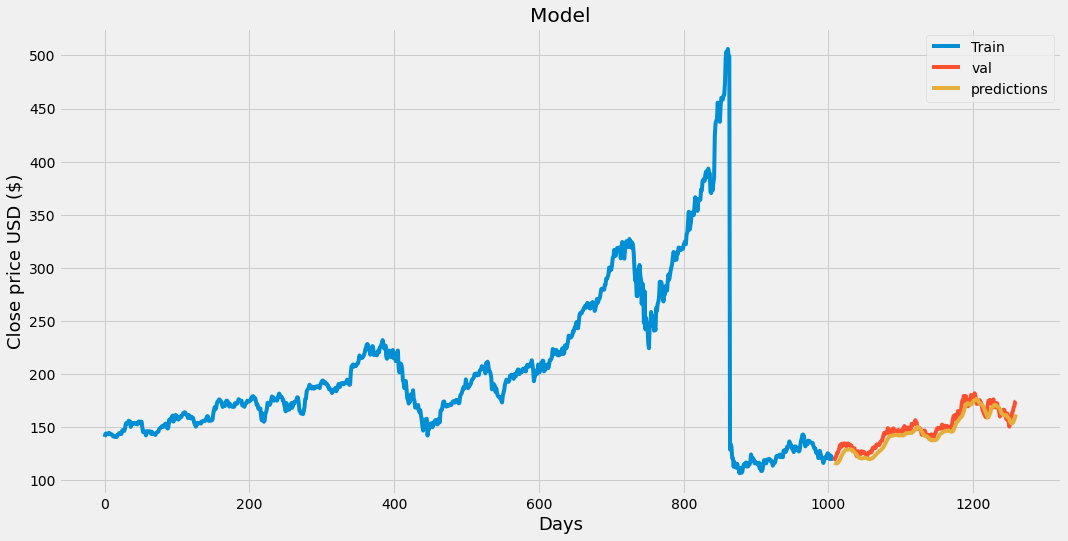

In [37]:
train=data[:training_data_len]
valid=data[training_data_len:]

valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Train','val','predictions'],loc='upper right')
plt.show()

In [40]:
valid

,close,predictions
1008,121.39,116.419800
1009,119.90,116.226646
1010,122.15,115.945877
1011,123.00,115.872581
1012,125.90,116.023064
...,...,...
1255,165.38,154.410675
1256,168.82,155.703217
1257,170.21,157.523712
1258,174.07,159.614624
